In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
upload =files.upload()

Saving delivery_time.csv to delivery_time (2).csv


In [3]:
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


##**EDA And DATA VISUALIZATIONS**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-5-ea2f6099b8bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

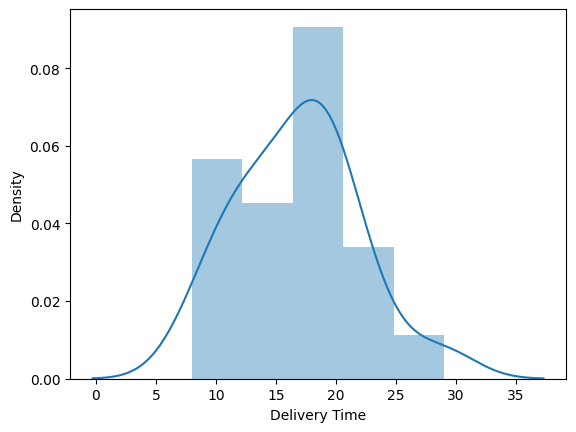

In [5]:
sns.distplot(dataset['Delivery Time'])

<ipython-input-6-87e4431da1bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

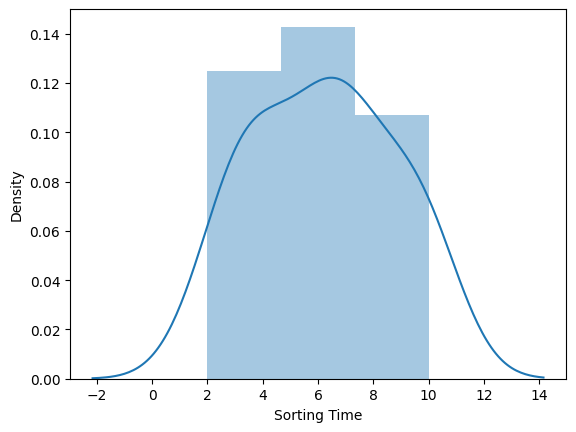

In [6]:
sns.distplot(dataset['Sorting Time'])

##**FEAUTRE Engeneering**

In [7]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


##**DATA CORRELATION ANALYSIS**

In [8]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

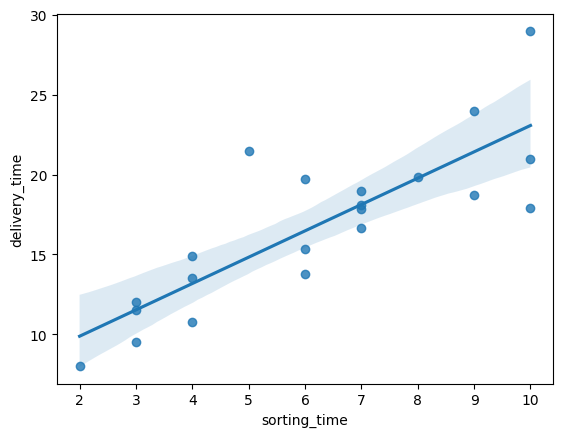

In [9]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

##**MODEL BUILDING**

In [10]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

##**MODEL TESTING**

In [11]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [13]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

##**MODEL PREDECTION**

In [14]:
dataset['prediction_values']=model.fittedvalues

In [15]:
dataset['Error_values']=model.resid

In [16]:
dataset['Actual_values']=6.582734+1.649020*dataset['sorting_time']+dataset['Error_values']
dataset.head()

,delivery_time,sorting_time,prediction_values,Error_values,Actual_values
0,21.00,10,23.072933,-2.072933,21.000001
1,13.50,4,13.178814,0.321186,13.500000
2,19.75,6,16.476853,3.273147,19.750001
3,24.00,9,21.423913,2.576087,24.000001
4,29.00,10,23.072933,5.927067,29.000001


##**MODEL PREDICTION USING LOG TRANSFORMATION**

In [41]:
upload=files.upload()

Saving delivery_time.csv to delivery_time (3).csv


In [42]:
data=pd.read_csv('delivery_time (1).csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [43]:
data.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)

In [44]:
data['DeliveryTime_log']=np.log(data['DeliveryTime'])
data.head()

,DeliveryTime,SortingTime,DeliveryTime_log
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


<ipython-input-45-a9da24348b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SortingTime'])


<Axes: xlabel='SortingTime', ylabel='Density'>

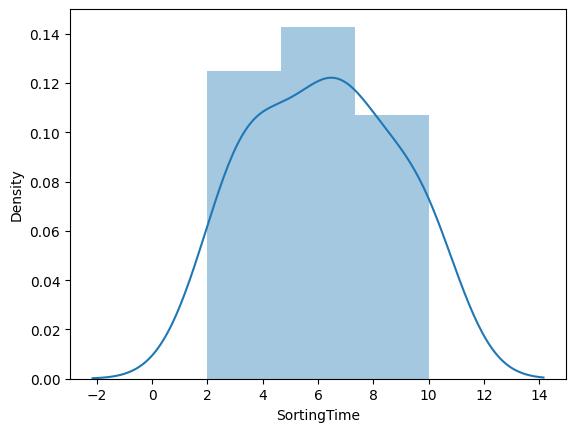

In [45]:
sns.distplot(data['SortingTime'])

<ipython-input-46-7ed751520cad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DeliveryTime_log'])


<Axes: xlabel='DeliveryTime_log', ylabel='Density'>

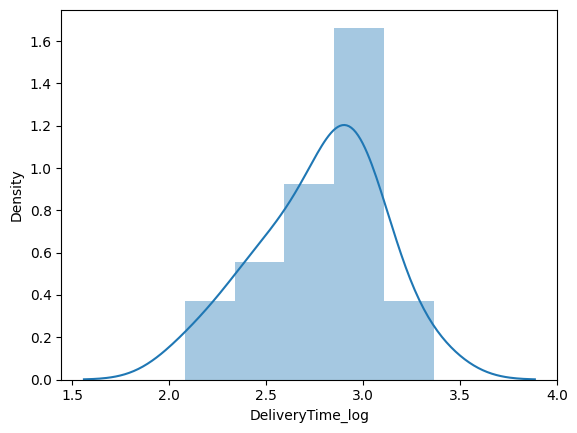

In [46]:
sns.distplot(data['DeliveryTime_log'])

In [47]:
x=data['SortingTime']
y=data['DeliveryTime_log']

In [48]:
model=smf.ols('y~x',data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime_log'>

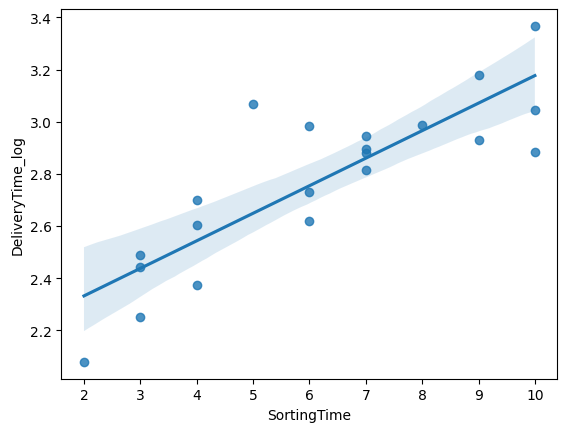

In [49]:
sns.regplot(x=x,y=y,data=data)

In [50]:
model.params

Intercept    2.121372
x            0.105552
dtype: float64

In [51]:
data['Predicted_values']=model.fittedvalues
data['Error_values']=model.resid
data['Y']=2.121372+0.105552*data['SortingTime']+data['Error_values']
data.head()

,DeliveryTime,SortingTime,DeliveryTime_log,Predicted_values,Error_values,Y
0,21.00,10,3.044522,3.176888,-0.132365,3.044527
1,13.50,4,2.602690,2.543578,0.059111,2.602691
2,19.75,6,2.983153,2.754681,0.228472,2.983156
3,24.00,9,3.178054,3.071336,0.106718,3.178058
4,29.00,10,3.367296,3.176888,0.190408,3.367300


##**MODEL PREDICTION USING SQRT TRANSFROM**

In [52]:
upload=files.upload()

Saving delivery_time.csv to delivery_time (4).csv


In [53]:
data=pd.read_csv('delivery_time (1).csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [54]:
data.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)

In [55]:
data['DeliveryTime_Sqrt']=np.sqrt(data['DeliveryTime'])

<ipython-input-56-78df9454f6a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DeliveryTime_Sqrt'])


<Axes: xlabel='DeliveryTime_Sqrt', ylabel='Density'>

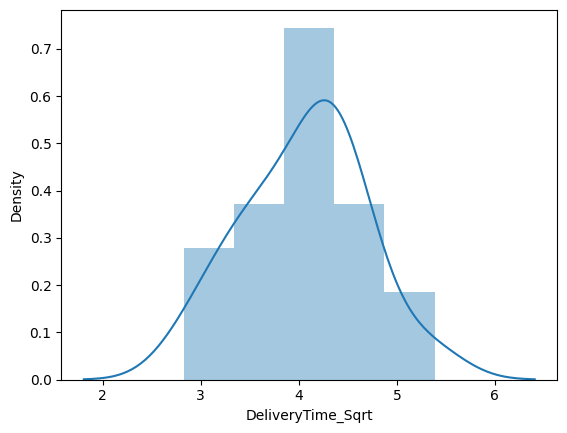

In [56]:
sns.distplot(data['DeliveryTime_Sqrt'])

<ipython-input-57-a9da24348b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SortingTime'])


<Axes: xlabel='SortingTime', ylabel='Density'>

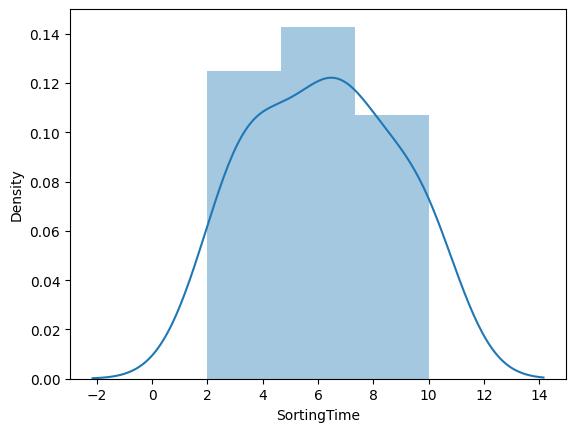

In [57]:
sns.distplot(data['SortingTime'])

In [58]:
x=data['SortingTime']
y=data['DeliveryTime_Sqrt']

In [59]:
model=smf.ols('y~x',data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime_Sqrt'>

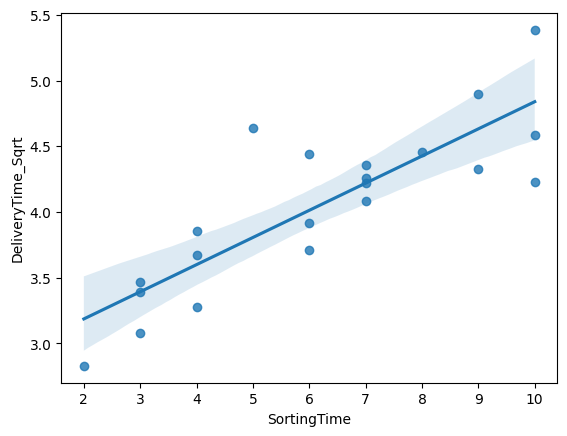

In [60]:
sns.regplot(x=x,y=y,data=data)

In [61]:
model.params

Intercept    2.772731
x            0.206632
dtype: float64

In [62]:
data['Predicted_values']=model.fittedvalues
data['Error_values']=model.resid
data['Y']=2.772731+0.206632*data['SortingTime']+data['Error_values']
data.head()

,DeliveryTime,SortingTime,DeliveryTime_Sqrt,Predicted_values,Error_values,Y
0,21.00,10,4.582576,4.839049,-0.256474,4.582577
1,13.50,4,3.674235,3.599258,0.074976,3.674235
2,19.75,6,4.444097,4.012522,0.431575,4.444098
3,24.00,9,4.898979,4.632417,0.266562,4.898981
4,29.00,10,5.385165,4.839049,0.546116,5.385167
